In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from q_solve import generate_result_envi_superpo
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup
from make_gif import make_gif_distribs1s2_new
from make_gif import make_gif_distribs1s2_new_zoomed
from Interference import total_interference
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image
#from overlap import compute_schmidt_full


We have a similarity metric, but I really want to investigate the Hilbert space occupation of the schmidt states over time. Do they share half half? does s1 really "give " its space to s2?

Seeing this zoomed gif, it really seems like it.

So we define a qtt to look at this more closely

In [2]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.0322
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 


In [ ]:
make_gif_distribs1s2_new_zoomed(Int_strength,w,result,eigenstates_total,eigenenergies_total,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distribs1s2_new(Int_strength,w,result,eigenstates_total,eigenenergies_total,[0],d1,d2,E_spacing,tmax,ind_nb)

In [37]:
from IPython.display import HTML

# Replace 'path_to_your_gif.gif' with the path to your GIF file
gif_path = '/Users/maringirard/Dev/Quantum_Branching/Gifs/zoomed_distrib_schmidt1_2_over_energy_spectrum_EI_0.0322_w_0.3_env_NA_d1_10_d2_200_Espace_1.0_tmax_10_ind_nb_100.gif'

# Create HTML code to display the GIF
html_code = f'<img src="{gif_path}">'

# Display the GIF
display(HTML(html_code))

gif_path = '/Users/maringirard/Dev/Quantum_Branching/Gifs/distrib_schmidt1_2_over_energy_spectrum_EI_0.0322_w_0.3_env_NA_d1_10_d2_200_Espace_1.0_tmax_10_ind_nb_100.gif'

# Create HTML code to display the GIF
html_code = f'<img src="{gif_path}">'

# Display the GIF
display(HTML(html_code))


To measure the "occupation"  of hilbert space, aquick and dirty way would be to simply have a cuttoff and count the number of eigenstates in which you have a higher value than the cuttoff.

In [3]:
def occupation(tlist,result,eigenstates_total,eigenenergies_total,EI,w,eps=0.001):
    c1_t=[]
    c2_t=[]
    for idx in range(len(tlist)-1):
        state = compute_schmidt_full(result,idx+1,1)
        state2 = compute_schmidt_full(result,idx+1,2)
        energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        count1 = sum(1 for coeff in energy_coeff if coeff > eps)
        count2 = sum(1 for coeff in energy_coeff2 if coeff > eps)
        c1_t.append(count1)
        c2_t.append(count2)
    plt.plot(tlist[0:len(tlist)-1], c1_t)
    plt.plot(tlist[0:len(tlist)-1], c2_t)
    plt.title(f"Plot of the occupation of Hilbert space by Schmidt1 and 2 over time for EI={EI}, w={w}, eps={eps}")
    plt.xlabel("Time")
    plt.ylabel("Count")
    plt.show()

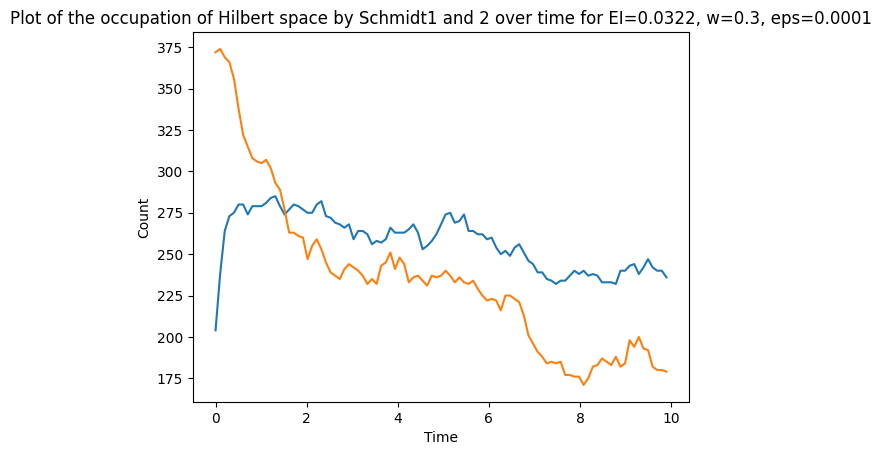

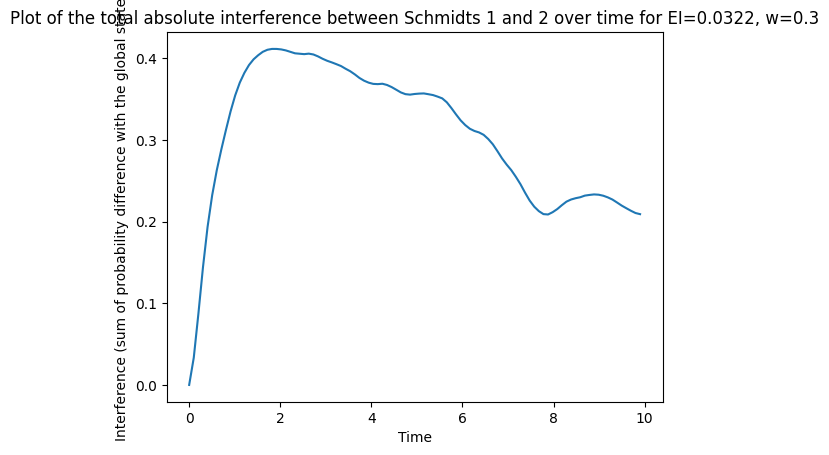

In [4]:
occupation(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w,eps=0.0001)
total_interference(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w)

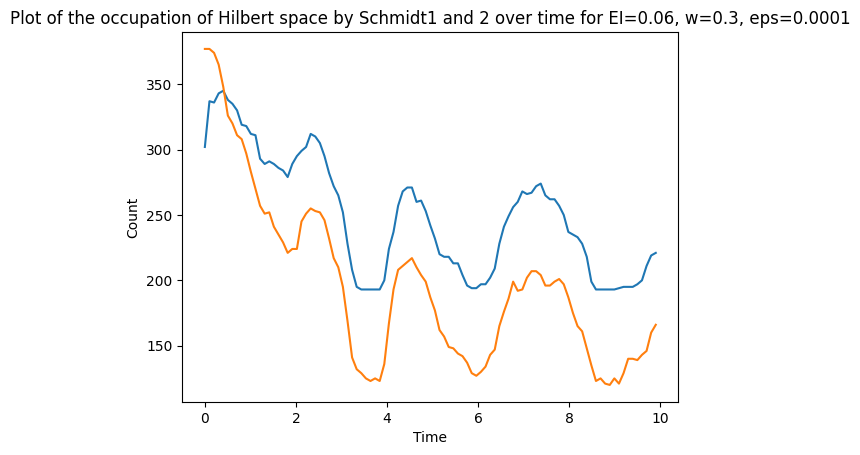

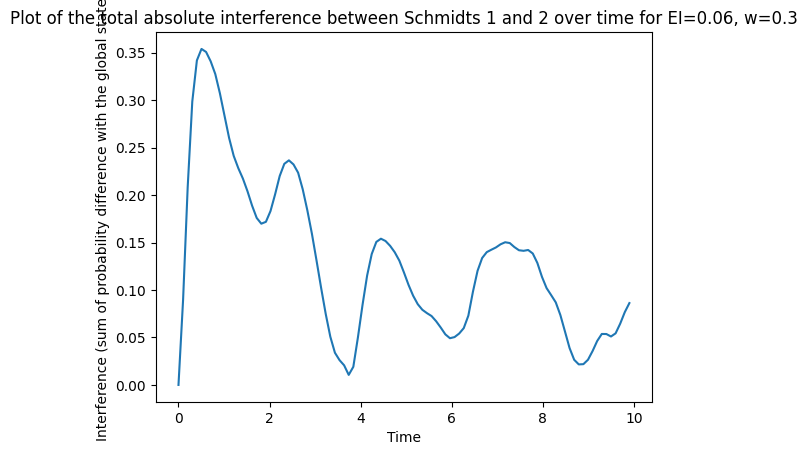

In [5]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
occupation(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w,eps=0.0001)
total_interference(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w)

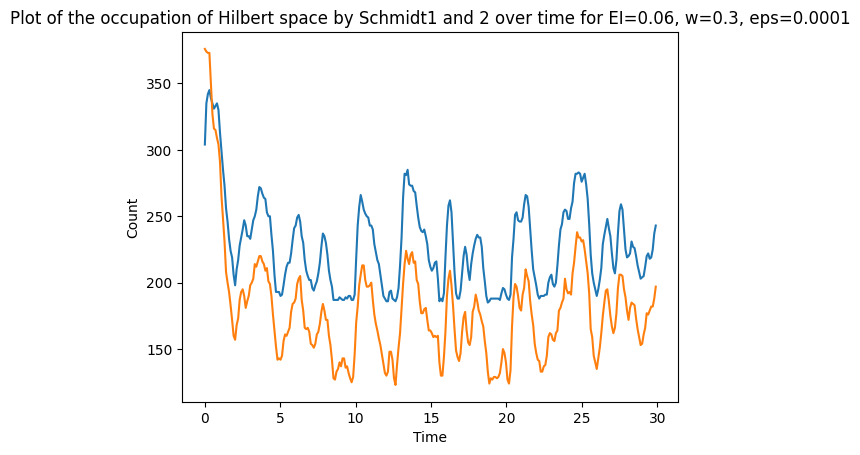

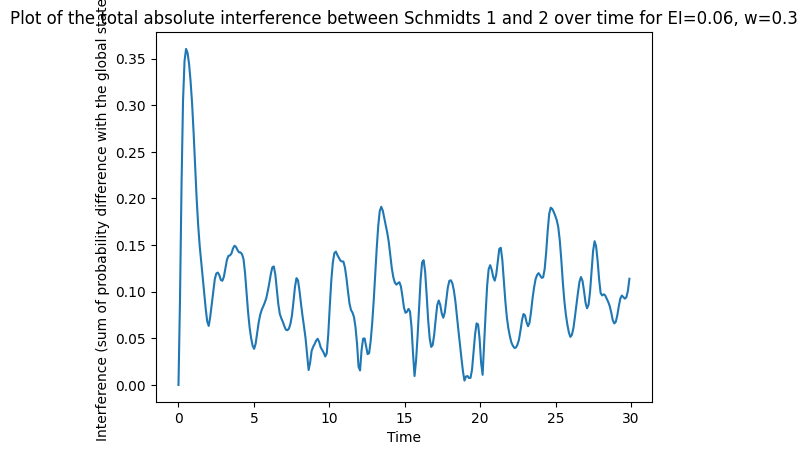

In [6]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 30
ind_nb = 300
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
occupation(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w,eps=0.0001)
total_interference(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w)

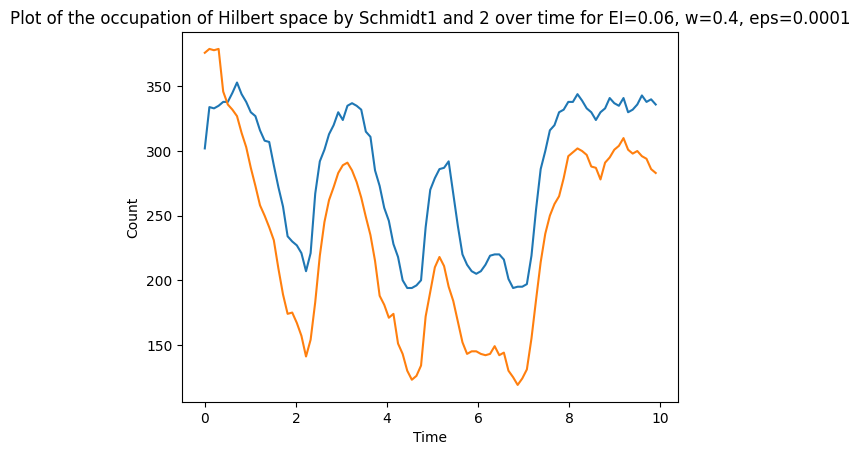

In [7]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.4# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
occupation(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w,eps=0.0001)

One thing we note is that the behavior is dependant on eps.

For eps = 0.0001, we see that both schmidts seem impacted the same, as if they where both interacted with the same. 

We dont see a trace of Schmidt 1 "giving" some of its Hilbert space to Schmidt 2, if anything, it seems that it starts the day by gaining occupation, before going down with S2. 

Does this go agains Andy's idea of divergent paths? since they are poushed aroud the same? We look over a longer timeframe and see that this commonality in behavior is kept

What explains the difference in value? is it that they have different spread? is it that they have different w, or different q?

These moments of common high and lows must be moments of high and low interference.


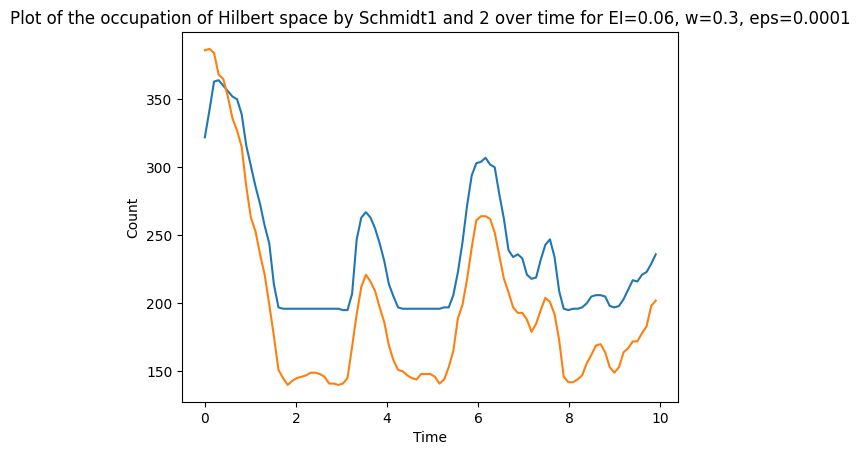

In [8]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_envi_superpo(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0,[75,150])
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
occupation(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w,eps=0.0001)